In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv('/Users/mac/MAIPRJ/Team2_Project/data_warehouse/habit_to_performance.csv')

In [45]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [46]:
# Print detailed statistics
print("=" * 60)
print("📊 EXAM SCORES STATISTICS")
print("=" * 60)
print(f"Mean (Trung bình):        {mean_score:.2f}")
print(f"Median (Trung vị):        {median_score:.2f}")
print(f"Mode (Giá trị phổ biến):  {df['exam_score'].mode()[0]:.2f}")
print(f"Standard Deviation (Độ lệch chuẩn): {std_score:.2f}")
print(f"Variance (Phương sai):    {df['exam_score'].var():.2f}")
print(f"Min (Điểm thấp nhất):     {df['exam_score'].min():.2f}")
print(f"Max (Điểm cao nhất):      {df['exam_score'].max():.2f}")
print(f"Range (Khoảng):           {df['exam_score'].max() - df['exam_score'].min():.2f}")
print(f"Q1 (25th percentile):     {df['exam_score'].quantile(0.25):.2f}")
print(f"Q2 (50th percentile):     {median_score:.2f}")
print(f"Q3 (75th percentile):     {df['exam_score'].quantile(0.75):.2f}")
print(f"IQR (Interquartile Range): {df['exam_score'].quantile(0.75) - df['exam_score'].quantile(0.25):.2f}")
print(f"Skewness (Độ lệch):       {df['exam_score'].skew():.2f}")
print(f"Kurtosis (Độ nhọn):       {df['exam_score'].kurtosis():.2f}")
print("=" * 60)
print(f"Total students: {len(df)}")
print("=" * 60)

📊 EXAM SCORES STATISTICS
Mean (Trung bình):        69.60
Median (Trung vị):        70.50
Mode (Giá trị phổ biến):  100.00
Standard Deviation (Độ lệch chuẩn): 16.89
Variance (Phương sai):    285.22
Min (Điểm thấp nhất):     18.40
Max (Điểm cao nhất):      100.00
Range (Khoảng):           81.60
Q1 (25th percentile):     58.48
Q2 (50th percentile):     70.50
Q3 (75th percentile):     81.33
IQR (Interquartile Range): 22.85
Skewness (Độ lệch):       -0.16
Kurtosis (Độ nhọn):       -0.42
Total students: 1000


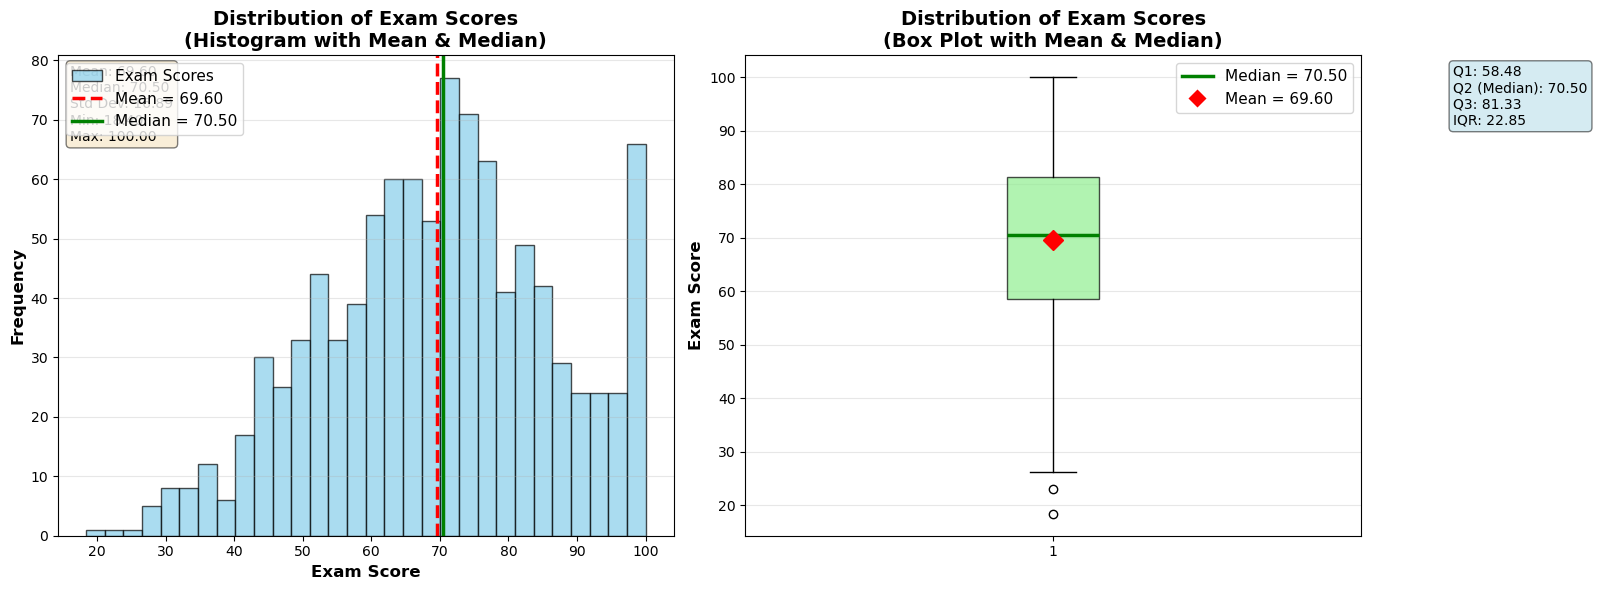

In [47]:
# Distribution of Exam Scores with Mean and Median
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate statistics
mean_score = df['exam_score'].mean()
median_score = df['exam_score'].median()
std_score = df['exam_score'].std()

# Plot 1: Histogram with Mean and Median lines
axes[0].hist(df['exam_score'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Exam Scores')
axes[0].axvline(mean_score, color='red', linestyle='--', linewidth=2.5, label=f'Mean = {mean_score:.2f}')
axes[0].axvline(median_score, color='green', linestyle='-', linewidth=2.5, label=f'Median = {median_score:.2f}')
axes[0].set_xlabel('Exam Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Exam Scores\n(Histogram with Mean & Median)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Add text box with statistics
textstr = f'Mean: {mean_score:.2f}\nMedian: {median_score:.2f}\nStd Dev: {std_score:.2f}\nMin: {df["exam_score"].min():.2f}\nMax: {df["exam_score"].max():.2f}'
axes[0].text(0.02, 0.98, textstr, transform=axes[0].transAxes, 
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Box plot with Mean and Median
bp = axes[1].boxplot(df['exam_score'], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightgreen', alpha=0.7),
                      medianprops=dict(color='green', linewidth=2.5, label='Median'),
                      meanprops=dict(marker='D', markerfacecolor='red', markeredgecolor='red', 
                                    markersize=10, label='Mean'),
                      showmeans=True,
                      meanline=False)

axes[1].set_ylabel('Exam Score', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Exam Scores\n(Box Plot with Mean & Median)', 
                  fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add legend for box plot
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='green', linewidth=2.5, label=f'Median = {median_score:.2f}'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='red', 
           markersize=10, label=f'Mean = {mean_score:.2f}')
]
axes[1].legend(handles=legend_elements, loc='upper right', fontsize=11)

# Add statistics text
textstr2 = f'Q1: {df["exam_score"].quantile(0.25):.2f}\nQ2 (Median): {median_score:.2f}\nQ3: {df["exam_score"].quantile(0.75):.2f}\nIQR: {df["exam_score"].quantile(0.75) - df["exam_score"].quantile(0.25):.2f}'
axes[1].text(1.15, 0.98, textstr2, transform=axes[1].transAxes, 
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

### 📊 Exam Scores Distribution with Mean & Median

In [48]:
# Check column names and data types
print("Column names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print(f"\nDataset shape: {df.shape}")

Column names:
['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']

Data types:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: ob

In [49]:
# Summary statistics by gender
summary_by_gender = df.groupby('gender').agg({
    'exam_score': ['mean', 'median', 'std'],
    'study_hours_per_day': 'mean',
    'attendance_percentage': 'mean',
    'sleep_hours': 'mean',
    'mental_health_rating': 'mean'
}).round(2)

print("Summary Statistics by Gender:")
print(summary_by_gender)

Summary Statistics by Gender:
       exam_score               study_hours_per_day attendance_percentage  \
             mean median    std                mean                  mean   
gender                                                                      
Female      69.74   70.7  16.90                3.58                 84.37   
Male        69.37   70.2  17.15                3.51                 83.89   
Other       70.65   69.0  13.76                3.61                 84.08   

       sleep_hours mental_health_rating  
              mean                 mean  
gender                                   
Female        6.47                 5.45  
Male          6.44                 5.42  
Other         6.80                 5.48  


### 16. Summary Statistics by Gender

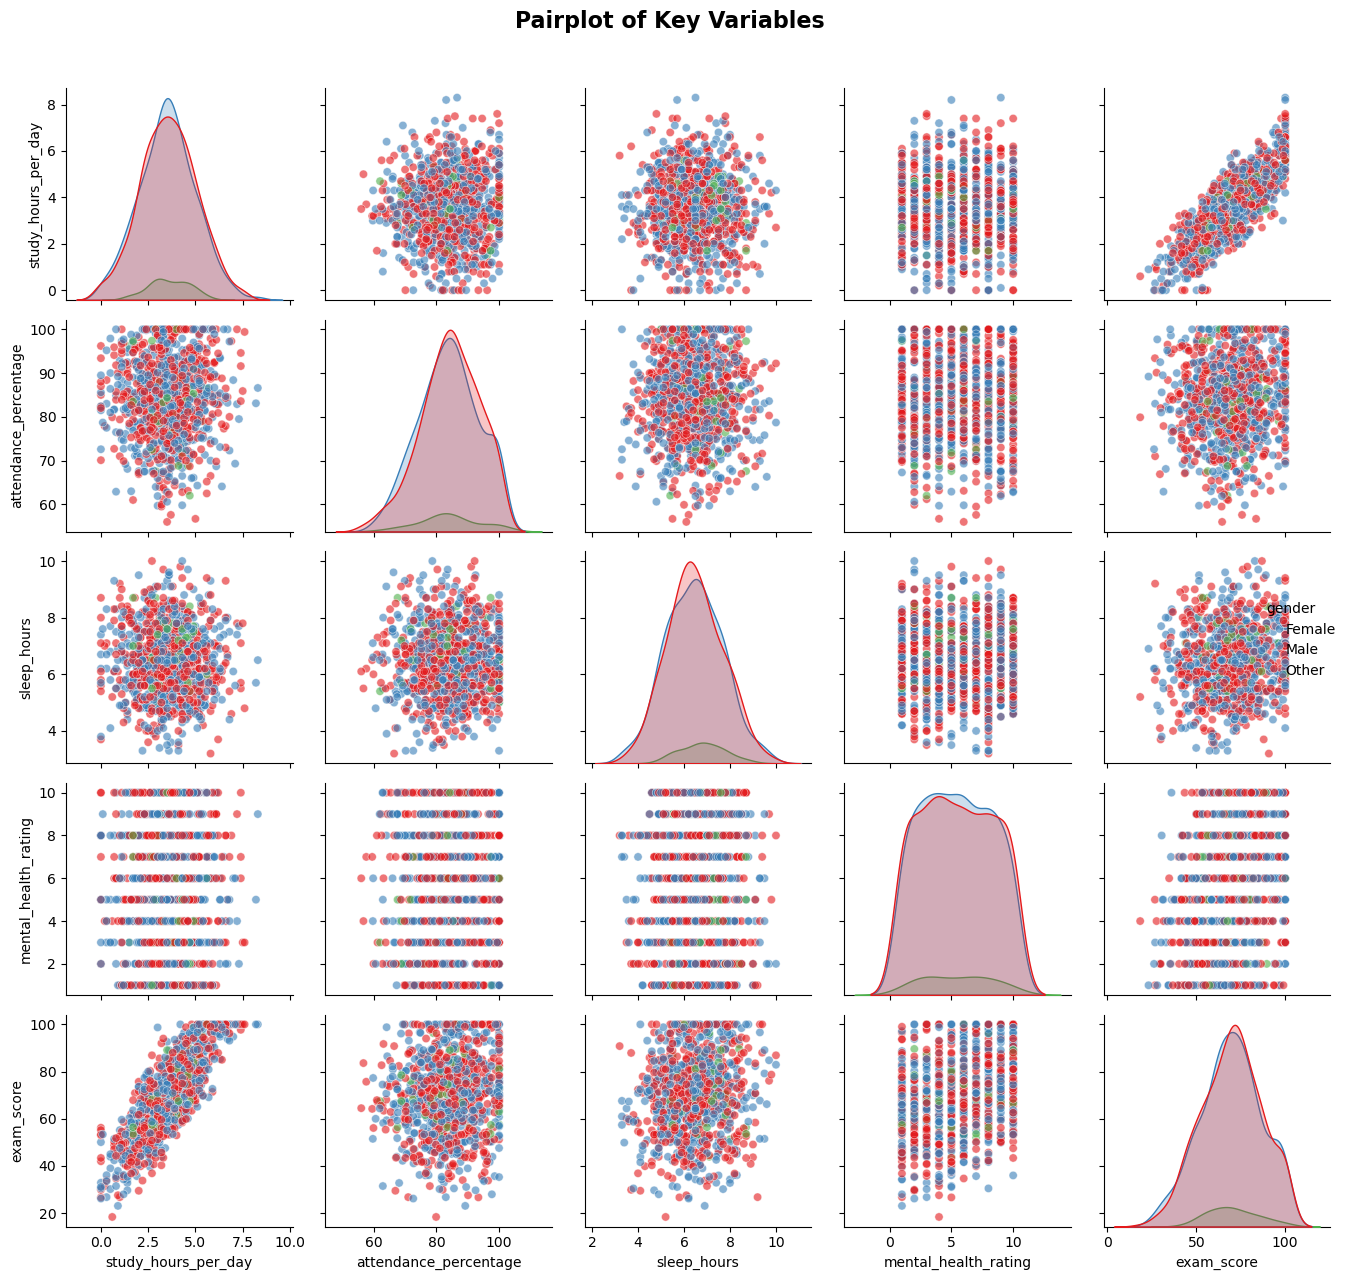

In [ ]:
# Pairplot for key variables
key_vars = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 
            'mental_health_rating', 'exam_score']
sns.pairplot(df[key_vars + ['gender']], hue='gender', palette='Set1', 
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 15. Multi-variable Pairplot (Key Variables)

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/2907954410.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


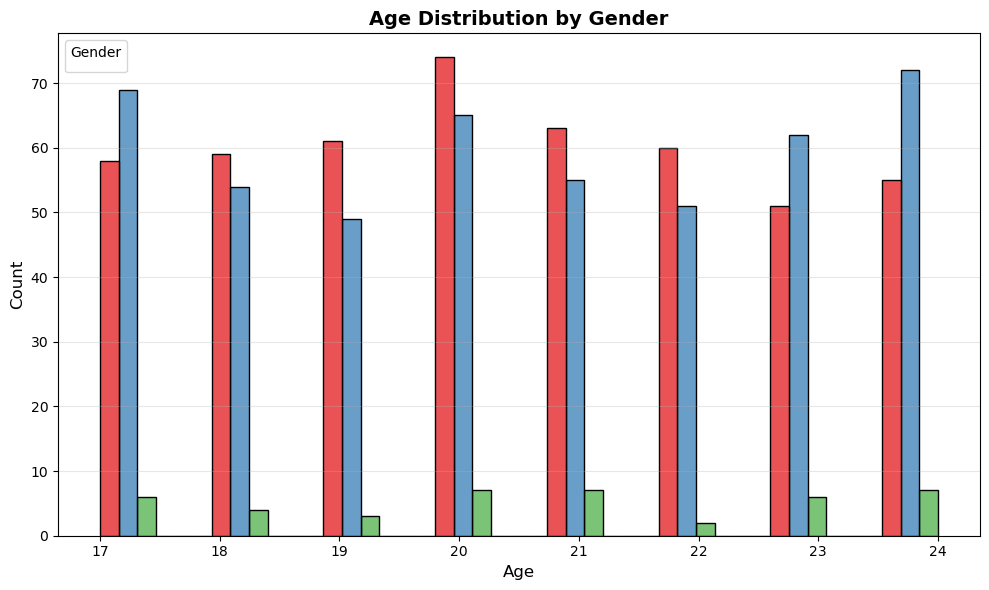

In [ ]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='gender', multiple='dodge', bins=15, palette='Set1')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 14. Age Distribution by Gender

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/3448730122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='extracurricular_participation', y='exam_score', palette='Set2')


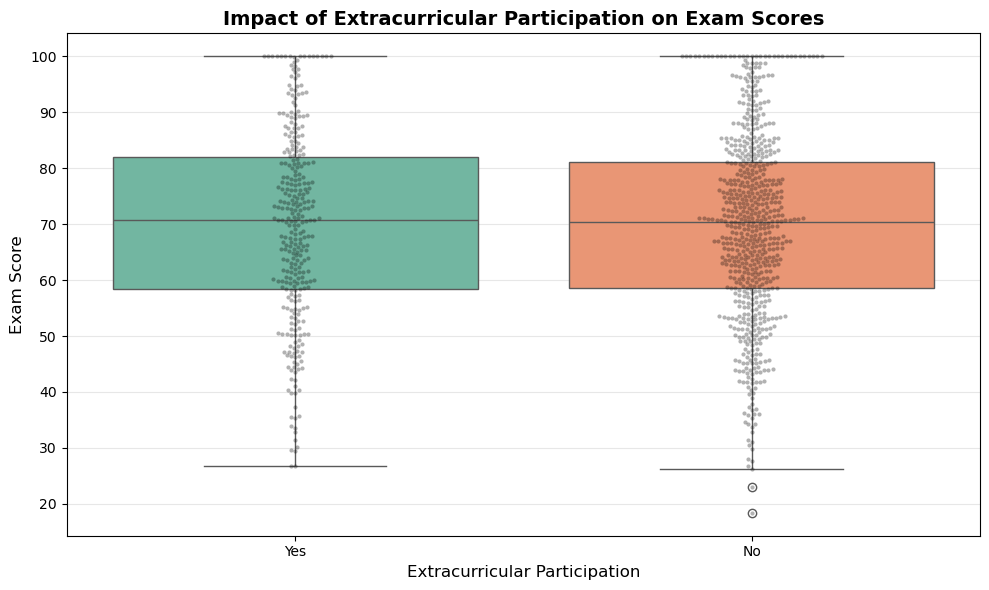

In [ ]:
# Extracurricular participation impact
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score', palette='Set2')
sns.swarmplot(data=df, x='extracurricular_participation', y='exam_score', 
              color='black', alpha=0.3, size=3)
plt.xlabel('Extracurricular Participation', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Impact of Extracurricular Participation on Exam Scores', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 13. Extracurricular Participation Impact

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/1990325351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='internet_quality', y='exam_score', palette='coolwarm')


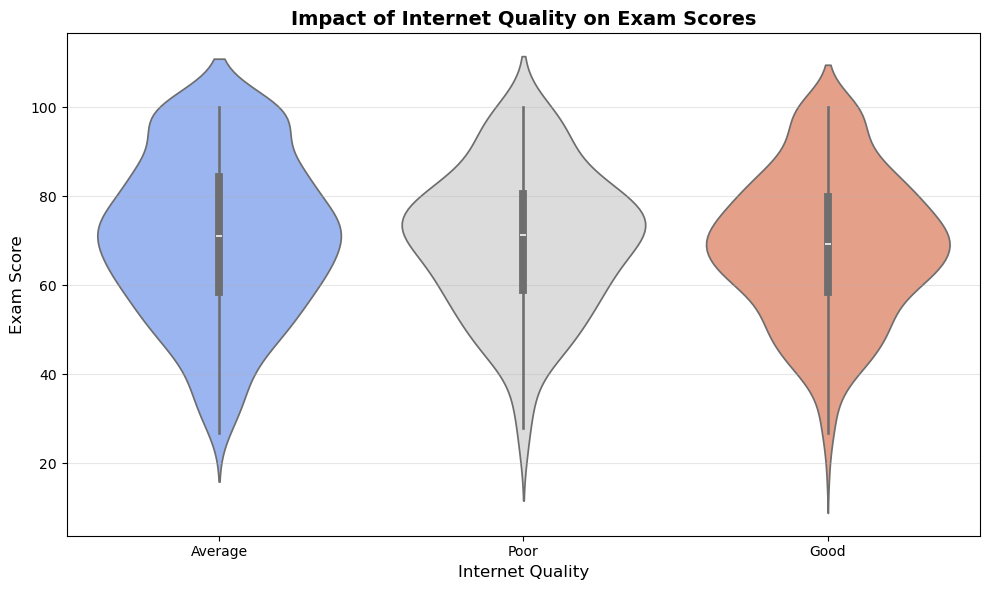

In [ ]:
# Internet quality impact
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='internet_quality', y='exam_score', palette='coolwarm')
plt.xlabel('Internet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Impact of Internet Quality on Exam Scores', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 12. Internet Quality Impact

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/1578794296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental_education_level', y='exam_score', palette='Pastel1')


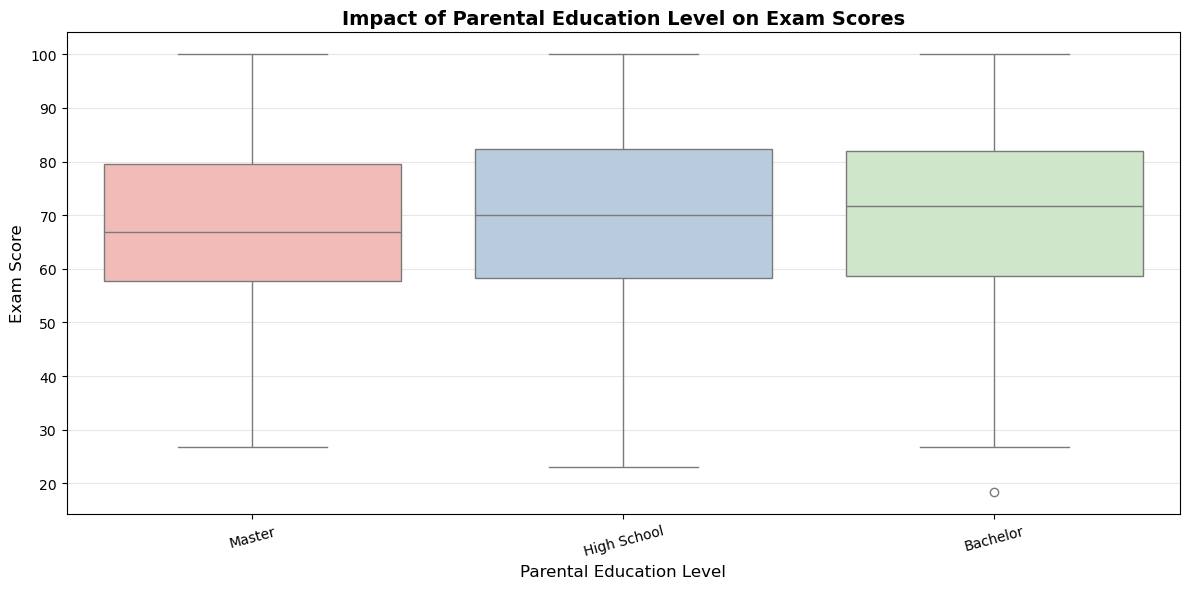

In [ ]:
# Parental education level impact
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='parental_education_level', y='exam_score', palette='Pastel1')
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Impact of Parental Education Level on Exam Scores', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 11. Parental Education Level Impact

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/188841206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='exercise_frequency', y='exam_score', palette='Greens')


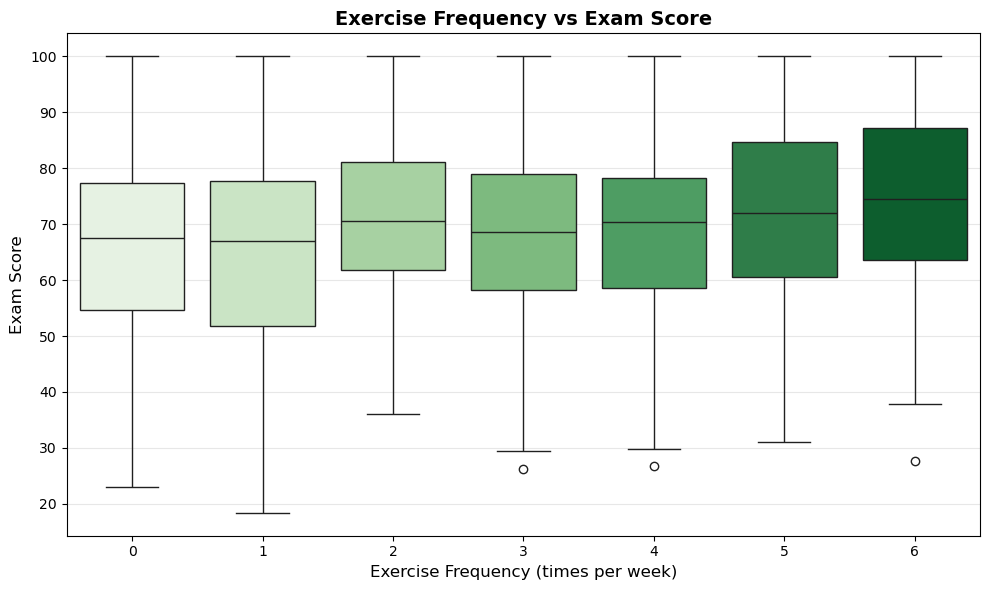

In [ ]:
# Exercise frequency vs exam score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='exercise_frequency', y='exam_score', palette='Greens')
plt.xlabel('Exercise Frequency (times per week)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Exercise Frequency vs Exam Score', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 10. Exercise Frequency Analysis

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/3332797349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='diet_quality', y='exam_score', palette='Set3')


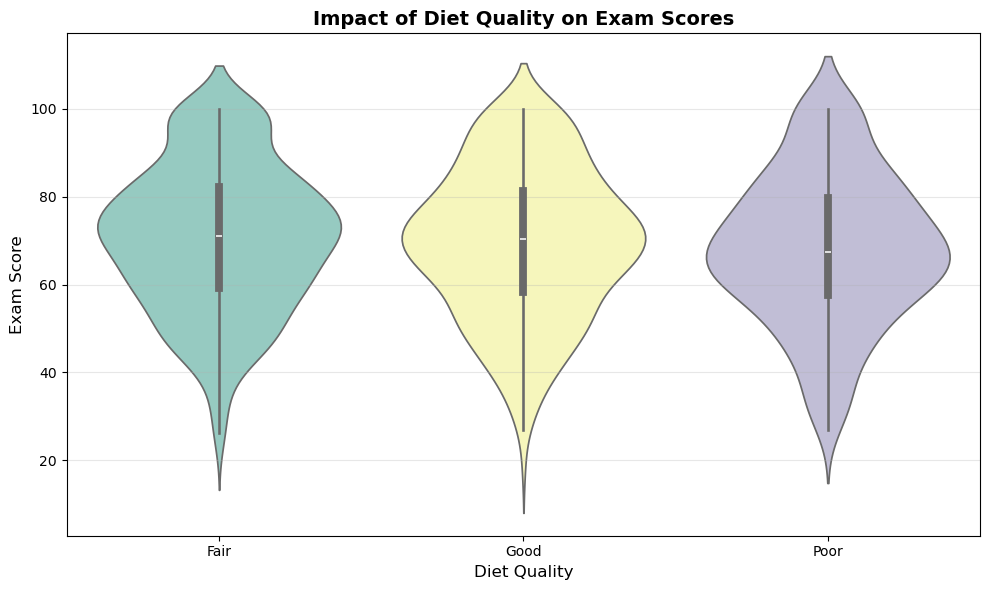

In [ ]:
# Diet quality impact on exam scores
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='diet_quality', y='exam_score', palette='Set3')
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Impact of Diet Quality on Exam Scores', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 9. Diet Quality Impact

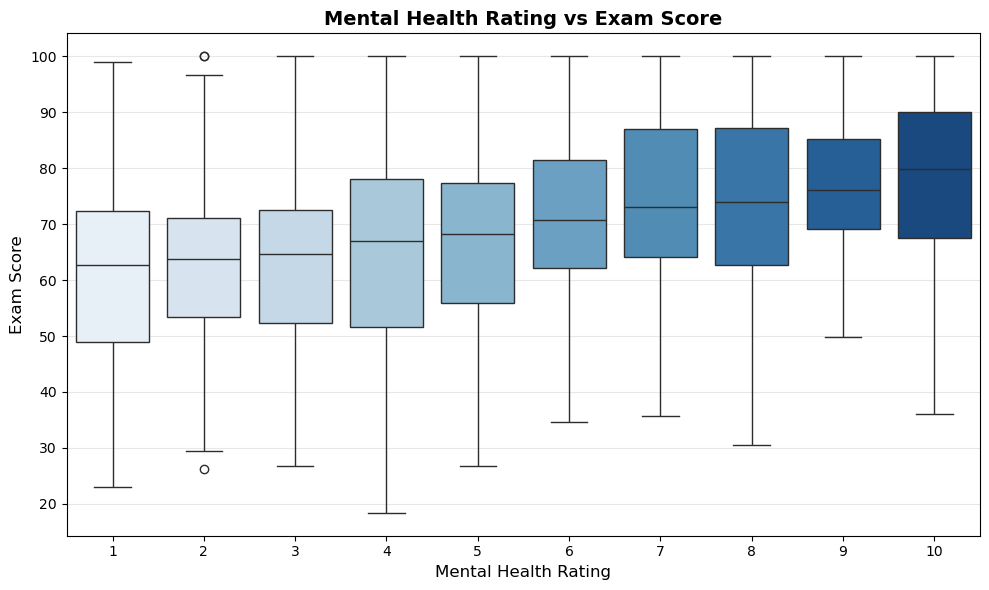

In [ ]:
# Mental health rating vs exam score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='mental_health_rating', y='exam_score', palette='Blues')
plt.xlabel('Mental Health Rating', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Mental Health Rating vs Exam Score', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 8. Mental Health Rating vs Exam Score

/var/folders/82/1zcbzb5s4k95yjv104b71qn40000gn/T/ipykernel_22889/1644924140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='part_time_job', y='exam_score', palette='Set2')


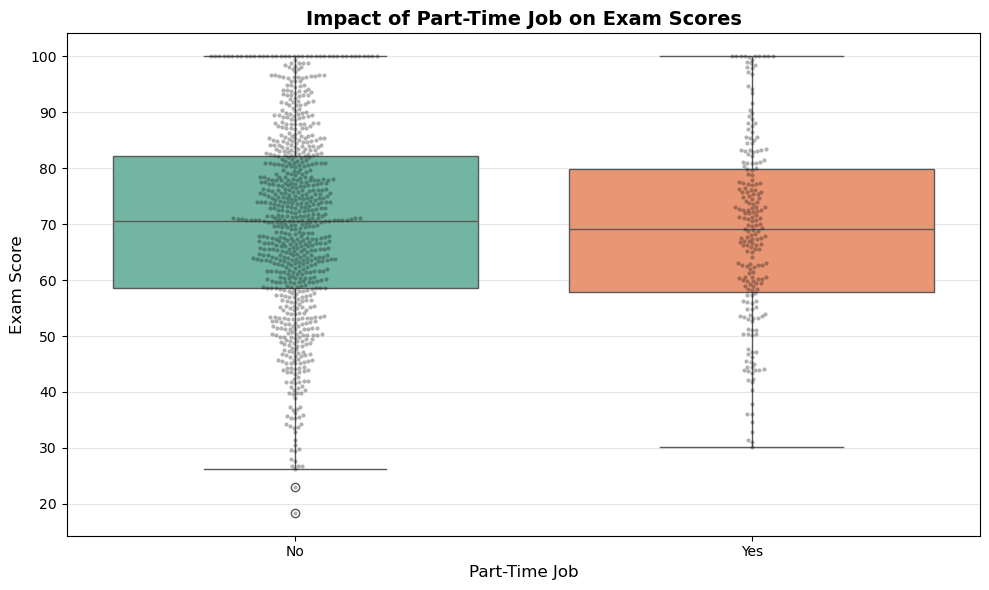

In [ ]:
# Part-time job impact on exam scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='part_time_job', y='exam_score', palette='Set2')
sns.swarmplot(data=df, x='part_time_job', y='exam_score', 
              color='black', alpha=0.3, size=3)
plt.xlabel('Part-Time Job', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Impact of Part-Time Job on Exam Scores', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 7. Part-Time Job Impact

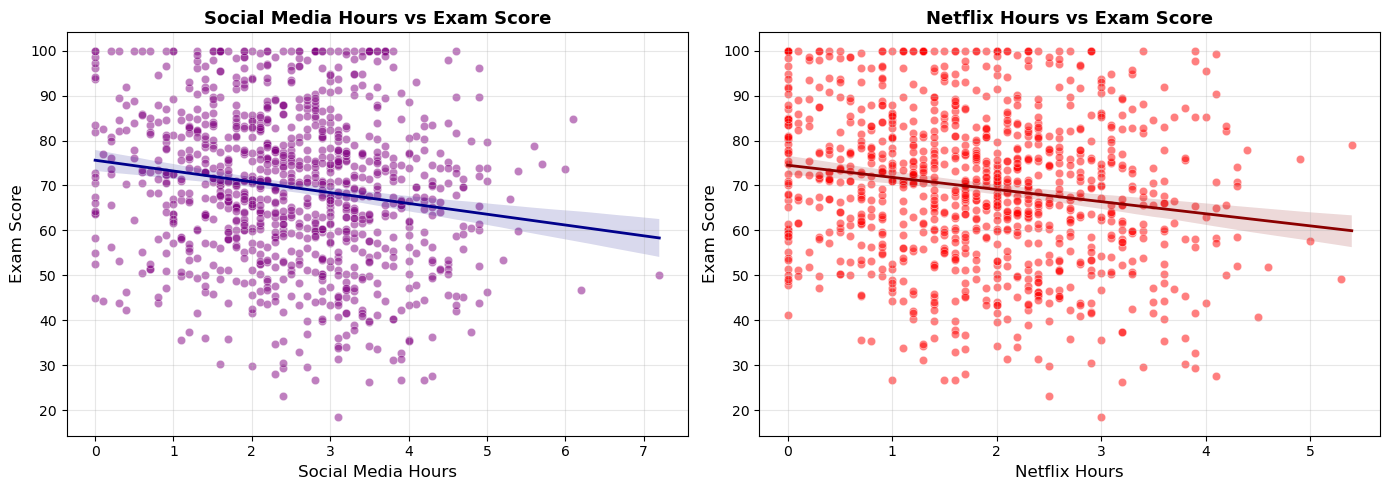

In [ ]:
# Social media and Netflix hours vs exam score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Social media
sns.scatterplot(data=df, x='social_media_hours', y='exam_score', 
                alpha=0.5, ax=axes[0], color='purple')
sns.regplot(data=df, x='social_media_hours', y='exam_score', 
            scatter=False, ax=axes[0], color='darkblue', line_kws={'linewidth': 2})
axes[0].set_xlabel('Social Media Hours', fontsize=12)
axes[0].set_ylabel('Exam Score', fontsize=12)
axes[0].set_title('Social Media Hours vs Exam Score', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# Netflix
sns.scatterplot(data=df, x='netflix_hours', y='exam_score', 
                alpha=0.5, ax=axes[1], color='red')
sns.regplot(data=df, x='netflix_hours', y='exam_score', 
            scatter=False, ax=axes[1], color='darkred', line_kws={'linewidth': 2})
axes[1].set_xlabel('Netflix Hours', fontsize=12)
axes[1].set_ylabel('Exam Score', fontsize=12)
axes[1].set_title('Netflix Hours vs Exam Score', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6. Social Media & Netflix Hours Impact

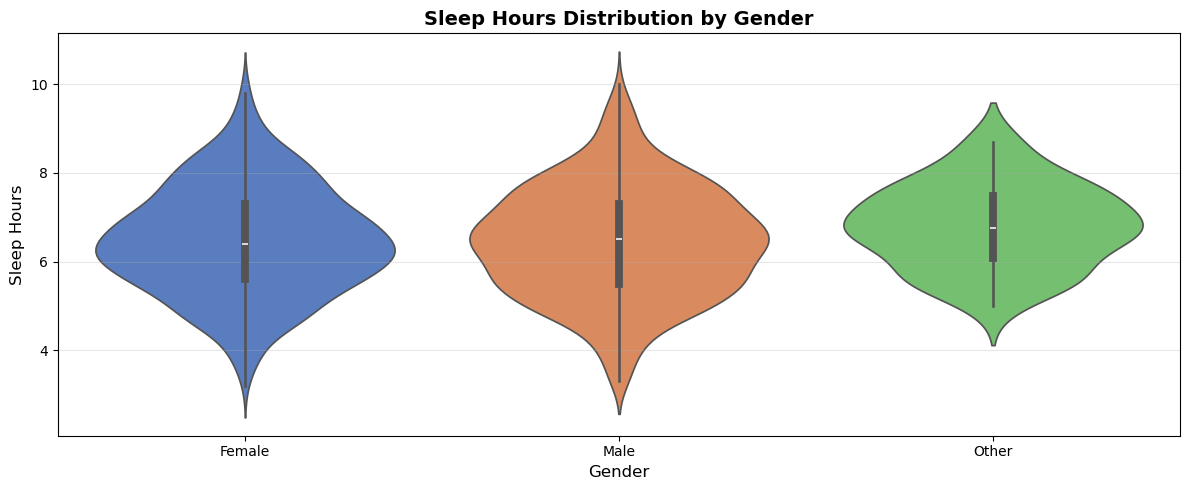

In [ ]:
# Sleep hours distribution by gender
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x='gender', y='sleep_hours', palette='muted')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Sleep Hours', fontsize=12)
plt.title('Sleep Hours Distribution by Gender', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5. Sleep Hours Distribution

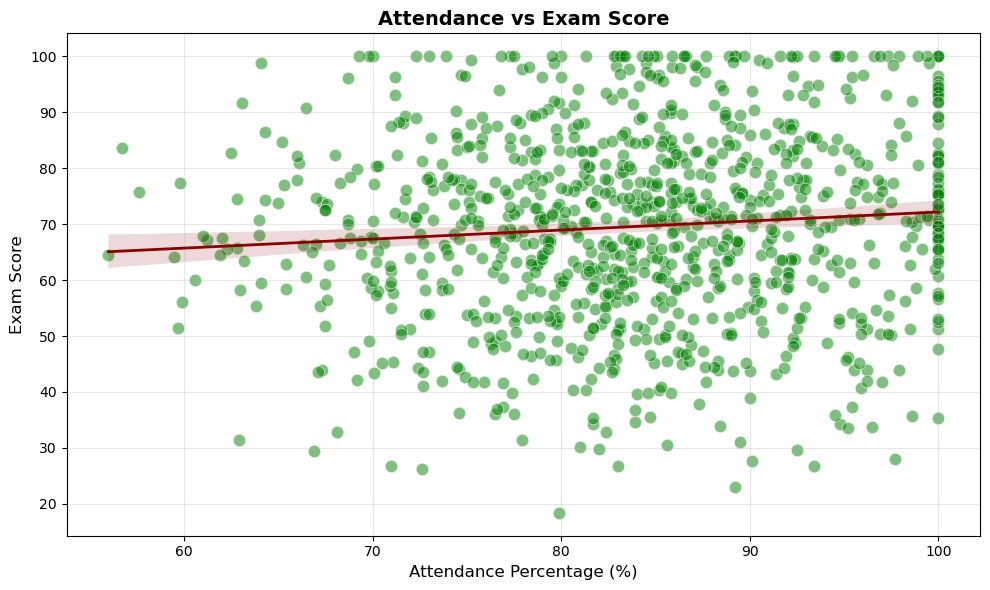

In [ ]:
# Attendance vs exam score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score', 
                alpha=0.5, s=80, color='green')
sns.regplot(data=df, x='attendance_percentage', y='exam_score', 
            scatter=False, color='darkred', line_kws={'linewidth': 2})
plt.xlabel('Attendance Percentage (%)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Attendance vs Exam Score', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Attendance Percentage vs Exam Score

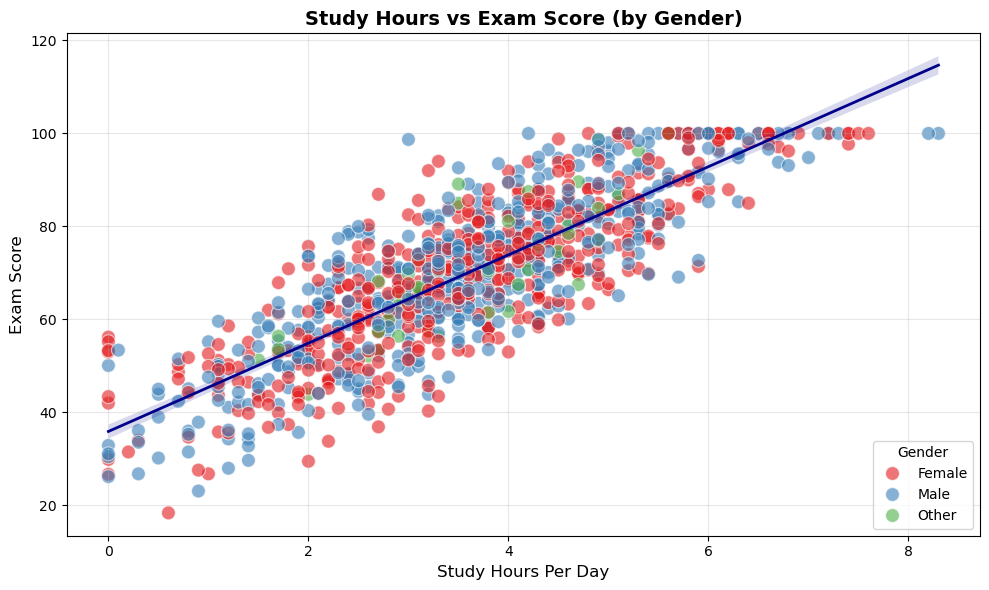

In [ ]:
# Study hours vs exam score scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', 
                hue='gender', alpha=0.6, s=100, palette='Set1')
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', 
            scatter=False, color='darkblue', line_kws={'linewidth': 2})
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Study Hours vs Exam Score (by Gender)', fontsize=14, fontweight='bold')
plt.legend(title='Gender', loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Study Hours vs Exam Score

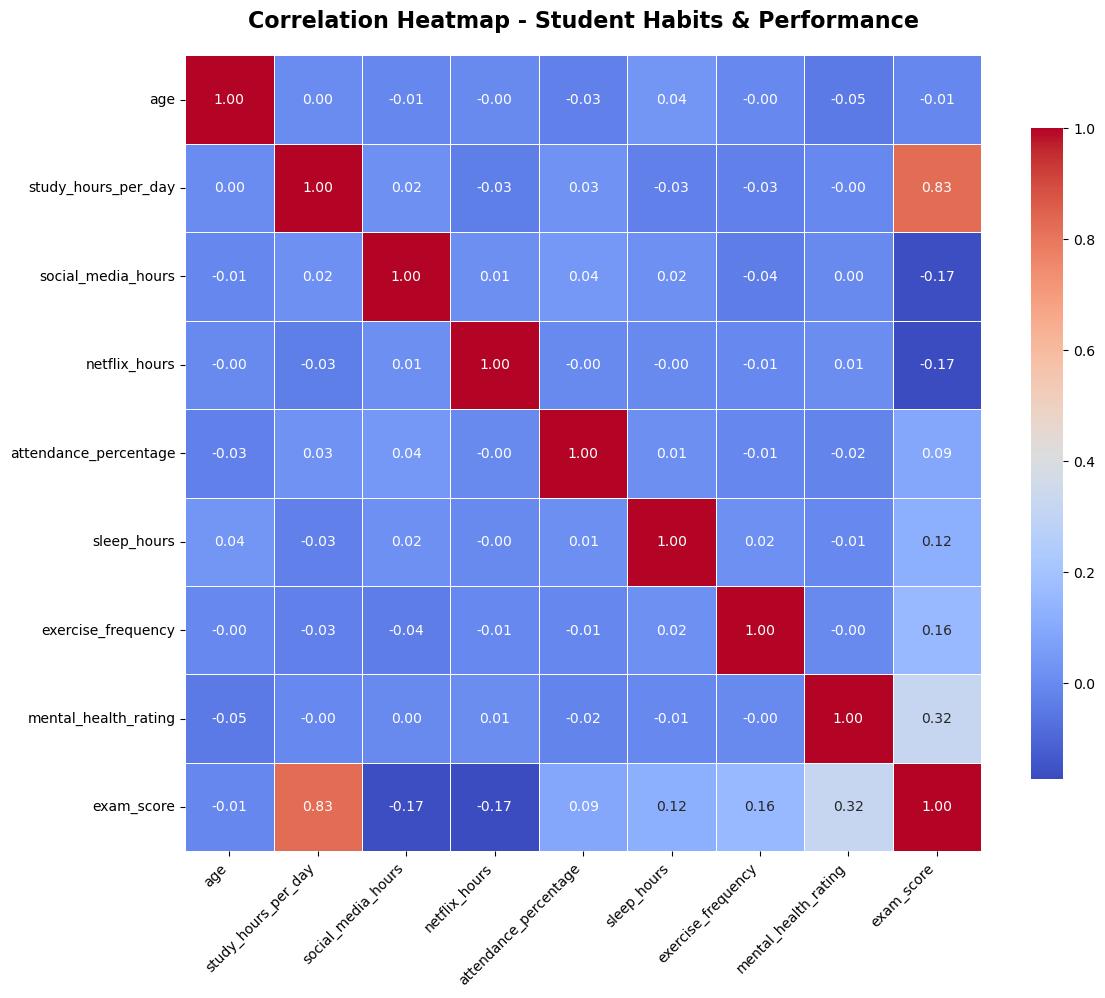

In [51]:
# Correlation heatmap for numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Student Habits & Performance', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 2. Correlation Heatmap (Numerical Variables)

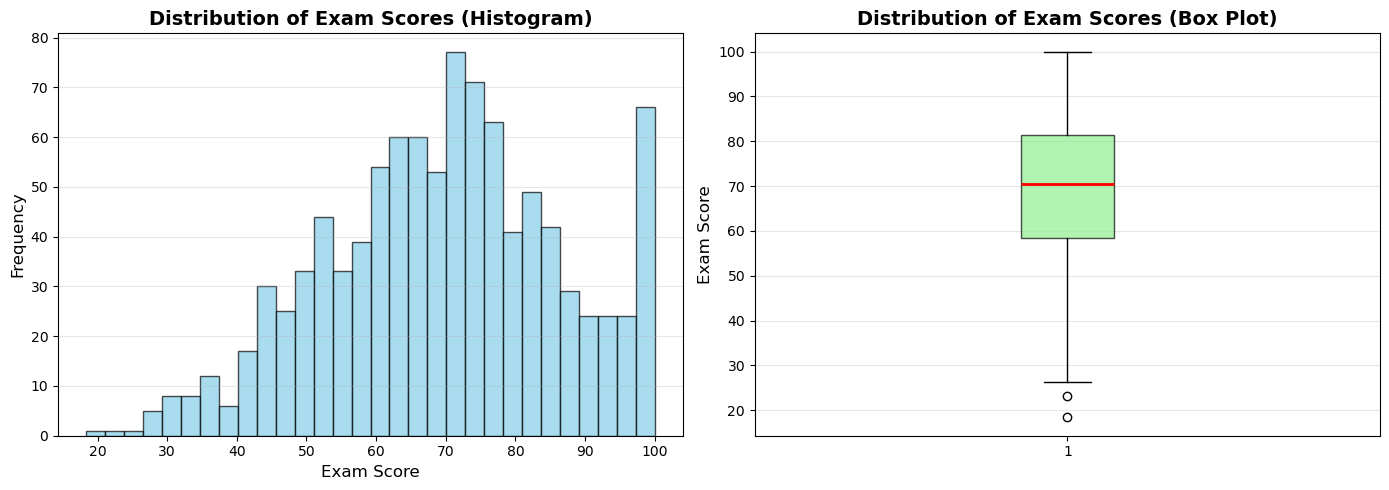

Mean exam score: 69.60
Median exam score: 70.50
Standard deviation: 16.89


In [50]:
# Distribution of Exam Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['exam_score'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Exam Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Exam Scores (Histogram)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['exam_score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Exam Score', fontsize=12)
axes[1].set_title('Distribution of Exam Scores (Box Plot)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean exam score: {df['exam_score'].mean():.2f}")
print(f"Median exam score: {df['exam_score'].median():.2f}")
print(f"Standard deviation: {df['exam_score'].std():.2f}")

### 1. Distribution of Exam Scores

## 📊 Data Visualizations

Comprehensive visualizations to explore the relationship between student habits and academic performance.

In [63]:
# Save results and best model
import pickle
import os

# Create models directory
models_dir = '/Users/mac/MAIPRJ/Team2_Project/models'
os.makedirs(models_dir, exist_ok=True)

# Save results dataframe
results_df.to_csv(f'{models_dir}/model_results.csv', index=False)
print(f"✓ Saved: {models_dir}/model_results.csv")

# Save best model
best_model = predictions_dict[best_model_name]['model']
with open(f'{models_dir}/best_model_{best_model_name.replace(" ", "_")}.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"✓ Saved: {models_dir}/best_model_{best_model_name.replace(' ', '_')}.pkl")

# Save scalers
with open(f'{models_dir}/scaler_standard.pkl', 'wb') as f:
    pickle.dump(scaler_standard, f)
print(f"✓ Saved: {models_dir}/scaler_standard.pkl")

with open(f'{models_dir}/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print(f"✓ Saved: {models_dir}/label_encoders.pkl")

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': best_predictions['y_test_pred'],
    'Residual': y_test.values - best_predictions['y_test_pred']
})
predictions_df.to_csv(f'{models_dir}/best_model_predictions.csv', index=False)
print(f"✓ Saved: {models_dir}/best_model_predictions.csv")

print(f"\n📁 All model files saved to: {models_dir}")
print("\n🎉 Machine Learning pipeline completed successfully!")

✓ Saved: /Users/mac/MAIPRJ/Team2_Project/models/model_results.csv
✓ Saved: /Users/mac/MAIPRJ/Team2_Project/models/best_model_Linear_Regression.pkl
✓ Saved: /Users/mac/MAIPRJ/Team2_Project/models/scaler_standard.pkl
✓ Saved: /Users/mac/MAIPRJ/Team2_Project/models/label_encoders.pkl
✓ Saved: /Users/mac/MAIPRJ/Team2_Project/models/best_model_predictions.csv

📁 All model files saved to: /Users/mac/MAIPRJ/Team2_Project/models

🎉 Machine Learning pipeline completed successfully!


### 10. Save Best Model & Results

In [62]:
# Final summary
print("=" * 100)
print("📊 FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 100)

print("\n🏆 TOP 3 MODELS (by Test R²):")
for i in range(min(3, len(results_df))):
    row = results_df.iloc[i]
    print(f"\n{i+1}. {row['Model']}")
    print(f"   ├─ Test R²:    {row['Test R²']:.4f}")
    print(f"   ├─ Test RMSE:  {row['Test RMSE']:.4f}")
    print(f"   ├─ Test MAE:   {row['Test MAE']:.4f}")
    print(f"   └─ Overfitting: {row['Overfitting']:.4f}")

print("\n" + "=" * 100)
print("📈 METRICS EXPLANATION:")
print("=" * 100)
print("• R² (R-squared): Proportion of variance explained (0 to 1, higher is better)")
print("  - Excellent: > 0.9")
print("  - Good: 0.7 - 0.9")
print("  - Moderate: 0.5 - 0.7")
print("  - Poor: < 0.5")
print("\n• RMSE (Root Mean Squared Error): Average prediction error (lower is better)")
print("  - Penalizes large errors more heavily")
print("\n• MAE (Mean Absolute Error): Average absolute prediction error (lower is better)")
print("  - More robust to outliers than RMSE")
print("\n• MSE (Mean Squared Error): Average squared error (lower is better)")
print("  - Emphasizes larger errors")
print("\n• Overfitting: Difference between Train R² and Test R²")
print("  - Good: < 0.05")
print("  - Acceptable: 0.05 - 0.1")
print("  - High: > 0.1")
print("=" * 100)

print(f"\n✅ Best Model: {best_model_name}")
print(f"   This model explains {best_r2*100:.2f}% of the variance in exam scores!")

📊 FINAL MODEL PERFORMANCE SUMMARY

🏆 TOP 3 MODELS (by Test R²):

1. Linear Regression
   ├─ Test R²:    0.8967
   ├─ Test RMSE:  0.3050
   ├─ Test MAE:   0.2472
   └─ Overfitting: 0.0050

2. Ridge Regression
   ├─ Test R²:    0.8966
   ├─ Test RMSE:  0.3050
   ├─ Test MAE:   0.2473
   └─ Overfitting: 0.0051

3. Gradient Boosting
   ├─ Test R²:    0.8700
   ├─ Test RMSE:  0.3421
   ├─ Test MAE:   0.2748
   └─ Overfitting: 0.1184

📈 METRICS EXPLANATION:
• R² (R-squared): Proportion of variance explained (0 to 1, higher is better)
  - Excellent: > 0.9
  - Good: 0.7 - 0.9
  - Moderate: 0.5 - 0.7
  - Poor: < 0.5

• RMSE (Root Mean Squared Error): Average prediction error (lower is better)
  - Penalizes large errors more heavily

• MAE (Mean Absolute Error): Average absolute prediction error (lower is better)
  - More robust to outliers than RMSE

• MSE (Mean Squared Error): Average squared error (lower is better)
  - Emphasizes larger errors

• Overfitting: Difference between Train R² and T

In [71]:
# Test với 3 student profiles khác nhau

print("="*80)
print("🎓 TESTING PREDICTION FUNCTION WITH DIFFERENT STUDENT PROFILES")
print("="*80)

# Example 1: Excellent Student
print("\n📚 Example 1: EXCELLENT STUDENT")
print("-" * 80)
excellent_student = {
    'age': 20,
    'gender': 'Female',
    'study_hours_per_day': 8.0,
    'social_media_hours': 1.0,
    'netflix_hours': 0.5,
    'part_time_job': 'No',
    'attendance_percentage': 95.0,
    'sleep_hours': 8.0,
    'diet_quality': 'Good',
    'exercise_frequency': 5,
    'parental_education_level': 'Master',
    'internet_quality': 'Good',
    'mental_health_rating': 9,
    'extracurricular_participation': 'Yes'
}

score1 = predict_exam_score(excellent_student)
print(f"\n🎯 Predicted Exam Score: {score1:.2f}/100")
print(f"   Grade: {'A+' if score1 >= 90 else 'A' if score1 >= 80 else 'B' if score1 >= 70 else 'C'}")

# Example 2: Average Student
print("\n\n📖 Example 2: AVERAGE STUDENT")
print("-" * 80)
average_student = {
    'age': 21,
    'gender': 'Male',
    'study_hours_per_day': 3.5,
    'social_media_hours': 4.0,
    'netflix_hours': 3.0,
    'part_time_job': 'Yes',
    'attendance_percentage': 75.0,
    'sleep_hours': 6.5,
    'diet_quality': 'Average',
    'exercise_frequency': 2,
    'parental_education_level': 'High School',
    'internet_quality': 'Average',
    'mental_health_rating': 6,
    'extracurricular_participation': 'No'
}

score2 = predict_exam_score(average_student)
print(f"\n🎯 Predicted Exam Score: {score2:.2f}/100")
print(f"   Grade: {'A+' if score2 >= 90 else 'A' if score2 >= 80 else 'B' if score2 >= 70 else 'C'}")

# Example 3: Struggling Student
print("\n\n📕 Example 3: STRUGGLING STUDENT")
print("-" * 80)
struggling_student = {
    'age': 19,
    'gender': 'Other',
    'study_hours_per_day': 1.5,
    'social_media_hours': 8.0,
    'netflix_hours': 6.0,
    'part_time_job': 'Yes',
    'attendance_percentage': 50.0,
    'sleep_hours': 5.0,
    'diet_quality': 'Poor',
    'exercise_frequency': 0,
    'parental_education_level': 'High School',
    'internet_quality': 'Poor',
    'mental_health_rating': 3,
    'extracurricular_participation': 'No'
}

score3 = predict_exam_score(struggling_student)
print(f"\n🎯 Predicted Exam Score: {score3:.2f}/100")
print(f"   Grade: {'A+' if score3 >= 90 else 'A' if score3 >= 80 else 'B' if score3 >= 70 else 'C' if score3 >= 60 else 'D' if score3 >= 50 else 'F'}")

print("\n" + "="*80)
print("📊 COMPARISON SUMMARY")
print("="*80)
print(f"Excellent Student:   {score1:.2f}/100")
print(f"Average Student:     {score2:.2f}/100")
print(f"Struggling Student:  {score3:.2f}/100")
print(f"\nDifference (Excellent - Struggling): {score1 - score3:.2f} points")
print("="*80)

🎓 TESTING PREDICTION FUNCTION WITH DIFFERENT STUDENT PROFILES

📚 Example 1: EXCELLENT STUDENT
--------------------------------------------------------------------------------

🎯 Predicted Exam Score: 100.00/100
   Grade: A+


📖 Example 2: AVERAGE STUDENT
--------------------------------------------------------------------------------
⚠️  Warning: Unknown value 'Average' in 'diet_quality', using default encoding

🎯 Predicted Exam Score: 61.54/100
   Grade: C


📕 Example 3: STRUGGLING STUDENT
--------------------------------------------------------------------------------

🎯 Predicted Exam Score: 8.89/100
   Grade: F

📊 COMPARISON SUMMARY
Excellent Student:   100.00/100
Average Student:     61.54/100
Struggling Student:  8.89/100

Difference (Excellent - Struggling): 91.11 points


In [72]:
# 💡 Try it yourself! Modify the values below to predict your exam score

my_profile = {
    'age': 20,                                    # Your age
    'gender': 'Male',                             # 'Male', 'Female', or 'Other'
    'study_hours_per_day': 5.0,                   # Hours you study per day
    'social_media_hours': 2.0,                    # Hours on social media per day
    'netflix_hours': 1.5,                         # Hours watching Netflix per day
    'part_time_job': 'No',                        # 'Yes' or 'No'
    'attendance_percentage': 90.0,                # Your attendance %
    'sleep_hours': 7.0,                           # Hours of sleep per night
    'diet_quality': 'Good',                       # 'Poor', 'Good' (not 'Average')
    'exercise_frequency': 4,                      # Times per week (0-7)
    'parental_education_level': 'Bachelor',       # 'High School', 'Associate', 'Bachelor', 'Master', 'PhD'
    'internet_quality': 'Good',                   # 'Poor', 'Good' (not 'Average')
    'mental_health_rating': 7,                    # Rating from 1-10
    'extracurricular_participation': 'Yes'        # 'Yes' or 'No'
}

# Predict
my_score = predict_exam_score(my_profile)

print("="*60)
print("🎯 YOUR PREDICTED EXAM SCORE")
print("="*60)
print(f"\nPredicted Score: {my_score:.2f}/100")

if my_score >= 90:
    grade = "A+"
    emoji = "🌟"
    comment = "Outstanding! Keep up the excellent work!"
elif my_score >= 80:
    grade = "A"
    emoji = "⭐"
    comment = "Great job! You're doing very well!"
elif my_score >= 70:
    grade = "B"
    emoji = "👍"
    comment = "Good work! There's room for improvement."
elif my_score >= 60:
    grade = "C"
    emoji = "📚"
    comment = "Fair performance. Focus on improving study habits."
elif my_score >= 50:
    grade = "D"
    emoji = "⚠️"
    comment = "Needs improvement. Consider studying more hours."
else:
    grade = "F"
    emoji = "🚨"
    comment = "Urgent attention needed! Review your study habits."

print(f"Grade: {grade} {emoji}")
print(f"\n{comment}")
print("="*60)

# Show key improvement areas
print("\n💡 RECOMMENDATIONS:")
if my_profile['study_hours_per_day'] < 4:
    print(f"   • Increase study hours (currently {my_profile['study_hours_per_day']}h/day → aim for 5-7h/day)")
if my_profile['social_media_hours'] > 3:
    print(f"   • Reduce social media time (currently {my_profile['social_media_hours']}h/day → aim for <2h/day)")
if my_profile['netflix_hours'] > 2:
    print(f"   • Limit entertainment time (currently {my_profile['netflix_hours']}h/day → aim for <1.5h/day)")
if my_profile['attendance_percentage'] < 85:
    print(f"   • Improve attendance (currently {my_profile['attendance_percentage']}% → aim for >90%)")
if my_profile['sleep_hours'] < 7:
    print(f"   • Get more sleep (currently {my_profile['sleep_hours']}h → aim for 7-8h)")
if my_profile['mental_health_rating'] < 6:
    print(f"   • Focus on mental health (current rating: {my_profile['mental_health_rating']}/10)")
if my_profile['exercise_frequency'] < 3:
    print(f"   • Exercise more (currently {my_profile['exercise_frequency']} times/week → aim for 3-5 times)")

print("="*60)

🎯 YOUR PREDICTED EXAM SCORE

Predicted Score: 91.87/100
Grade: A+ 🌟

Outstanding! Keep up the excellent work!

💡 RECOMMENDATIONS:


### Demo: Predict Your Own Score

### Test Prediction Function

In [70]:
def predict_exam_score(student_data):
    """
    Predict exam score for a new student using the trained Linear Regression model
    
    Parameters:
    -----------
    student_data : dict
        Dictionary containing student information with keys:
        - age: int (e.g., 18-25)
        - gender: str ('Male', 'Female', 'Other')
        - study_hours_per_day: float (e.g., 0.5-10.0)
        - social_media_hours: float (e.g., 0.0-12.0)
        - netflix_hours: float (e.g., 0.0-10.0)
        - part_time_job: str ('Yes', 'No')
        - attendance_percentage: float (e.g., 0-100)
        - sleep_hours: float (e.g., 4.0-10.0)
        - diet_quality: str ('Poor', 'Average', 'Good')
        - exercise_frequency: int (0-7 times per week)
        - parental_education_level: str ('High School', 'Associate', 'Bachelor', 'Master', 'PhD')
        - internet_quality: str ('Poor', 'Average', 'Good')
        - mental_health_rating: int (1-10)
        - extracurricular_participation: str ('Yes', 'No')
    
    Returns:
    --------
    float : Predicted exam score (0-100)
    """
    
    # Create a copy of input data
    input_data = student_data.copy()
    
    # Step 1: Encode categorical variables using saved label encoders
    categorical_cols = ['gender', 'part_time_job', 'diet_quality', 
                       'parental_education_level', 'internet_quality', 
                       'extracurricular_participation']
    
    for col in categorical_cols:
        if col in input_data and col in label_encoders:
            try:
                input_data[col] = label_encoders[col].transform([input_data[col]])[0]
            except ValueError:
                # If category not seen during training, use most common value (0)
                input_data[col] = 0
                print(f"⚠️  Warning: Unknown value '{student_data[col]}' in '{col}', using default encoding")
    
    # Step 2: Add placeholder for exam_score
    input_data['exam_score'] = 0
    
    # Step 3: Create DataFrame with correct feature order (same as scaler expects)
    scaler_features = ['age', 'gender', 'study_hours_per_day', 'social_media_hours', 
                      'netflix_hours', 'part_time_job', 'attendance_percentage', 
                      'sleep_hours', 'diet_quality', 'exercise_frequency', 
                      'parental_education_level', 'internet_quality', 
                      'mental_health_rating', 'extracurricular_participation', 'exam_score']
    
    input_df = pd.DataFrame([input_data], columns=scaler_features)
    
    # Step 4: Standardize all features
    input_scaled = scaler_standard.transform(input_df)
    
    # Step 5: Extract only the features for prediction (exclude exam_score which is last)
    X_input = input_scaled[:, :-1]  # All features except last one (exam_score)
    
    # Step 6: Make prediction (output is standardized exam_score)
    predicted_score_standardized = best_model.predict(X_input)[0]
    
    # Step 7: Convert back to original scale
    exam_score_idx = scaler_features.index('exam_score')
    mean_exam = scaler_standard.mean_[exam_score_idx]
    std_exam = scaler_standard.scale_[exam_score_idx]
    
    # Inverse standardization: original = (standardized * std) + mean
    predicted_score = (predicted_score_standardized * std_exam) + mean_exam
    
    # Ensure score is within valid range (0-100)
    predicted_score = np.clip(predicted_score, 0, 100)
    
    return predicted_score

print("✅ Prediction function created successfully!")
print("\nUsage example:")
print("score = predict_exam_score({")
print("    'age': 20,")
print("    'gender': 'Male',")
print("    'study_hours_per_day': 5.0,")
print("    'social_media_hours': 2.0,")
print("    'netflix_hours': 1.5,")
print("    'part_time_job': 'No',")
print("    'attendance_percentage': 90.0,")
print("    'sleep_hours': 7.0,")
print("    'diet_quality': 'Good',")
print("    'exercise_frequency': 4,")
print("    'parental_education_level': 'Bachelor',")
print("    'internet_quality': 'Good',")
print("    'mental_health_rating': 7,")
print("    'extracurricular_participation': 'Yes'")
print("})")
print("print(f'Predicted Exam Score: {score:.2f}')")

✅ Prediction function created successfully!

Usage example:
score = predict_exam_score({
    'age': 20,
    'gender': 'Male',
    'study_hours_per_day': 5.0,
    'social_media_hours': 2.0,
    'netflix_hours': 1.5,
    'part_time_job': 'No',
    'attendance_percentage': 90.0,
    'sleep_hours': 7.0,
    'diet_quality': 'Good',
    'exercise_frequency': 4,
    'parental_education_level': 'Bachelor',
    'internet_quality': 'Good',
    'mental_health_rating': 7,
    'extracurricular_participation': 'Yes'
})
print(f'Predicted Exam Score: {score:.2f}')


## 🎯 Prediction Function

Function để predict exam scores cho student mới sử dụng Linear Regression model

### 9. Model Performance Summary

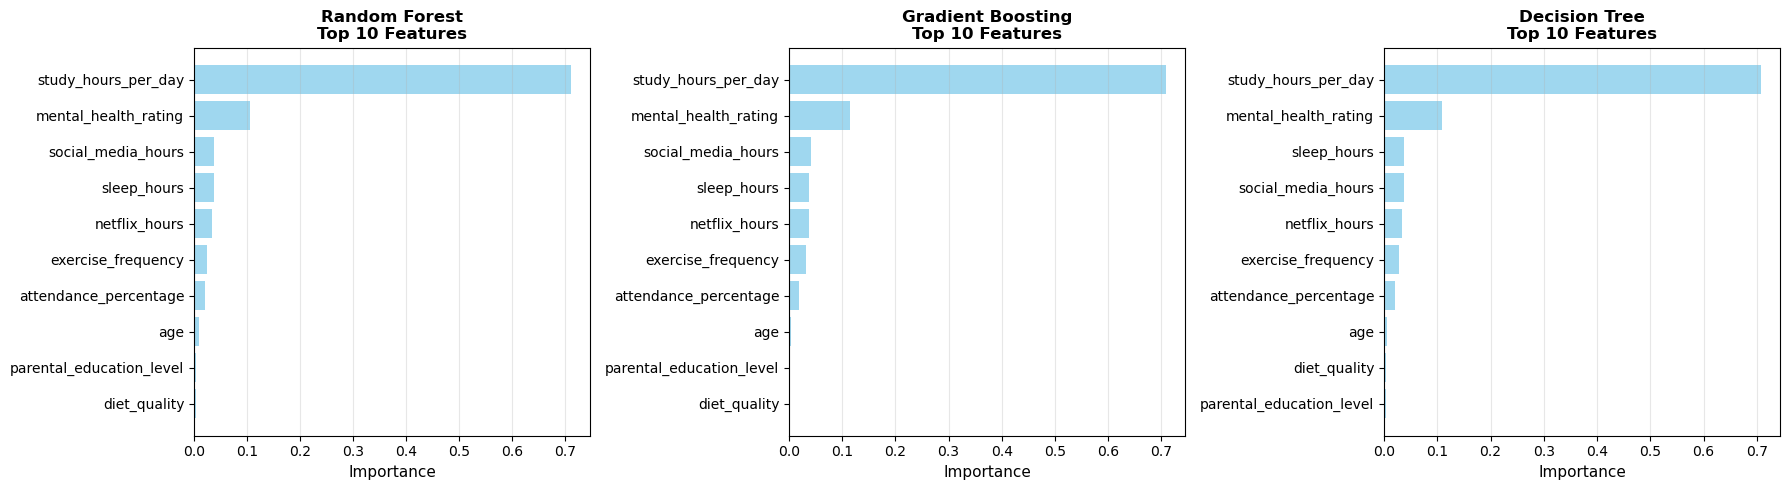

In [61]:
# Feature importance for tree-based models
tree_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

fig, axes = plt.subplots(1, len(tree_models), figsize=(18, 5))

for idx, model_name in enumerate(tree_models):
    if model_name in predictions_dict:
        model = predictions_dict[model_name]['model']
        
        # Get feature importance
        importances = model.feature_importances_
        feature_names = X_train_std.columns
        
        # Sort by importance
        indices = np.argsort(importances)[::-1][:10]  # Top 10 features
        
        # Plot
        axes[idx].barh(range(len(indices)), importances[indices], alpha=0.8, color='skyblue')
        axes[idx].set_yticks(range(len(indices)))
        axes[idx].set_yticklabels([feature_names[i] for i in indices])
        axes[idx].set_xlabel('Importance', fontsize=11)
        axes[idx].set_title(f'{model_name}\nTop 10 Features', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)
        axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

# Print top 5 features for best model if it's tree-based
if best_model_name in tree_models:
    print(f"\n🌟 Top 5 Most Important Features ({best_model_name}):")
    model = predictions_dict[best_model_name]['model']
    importances = model.feature_importances_
    feature_names = X_train_std.columns
    indices = np.argsort(importances)[::-1][:5]
    
    for i, idx in enumerate(indices, 1):
        print(f"   {i}. {feature_names[idx]}: {importances[idx]:.4f}")

### 8. Feature Importance (for tree-based models)

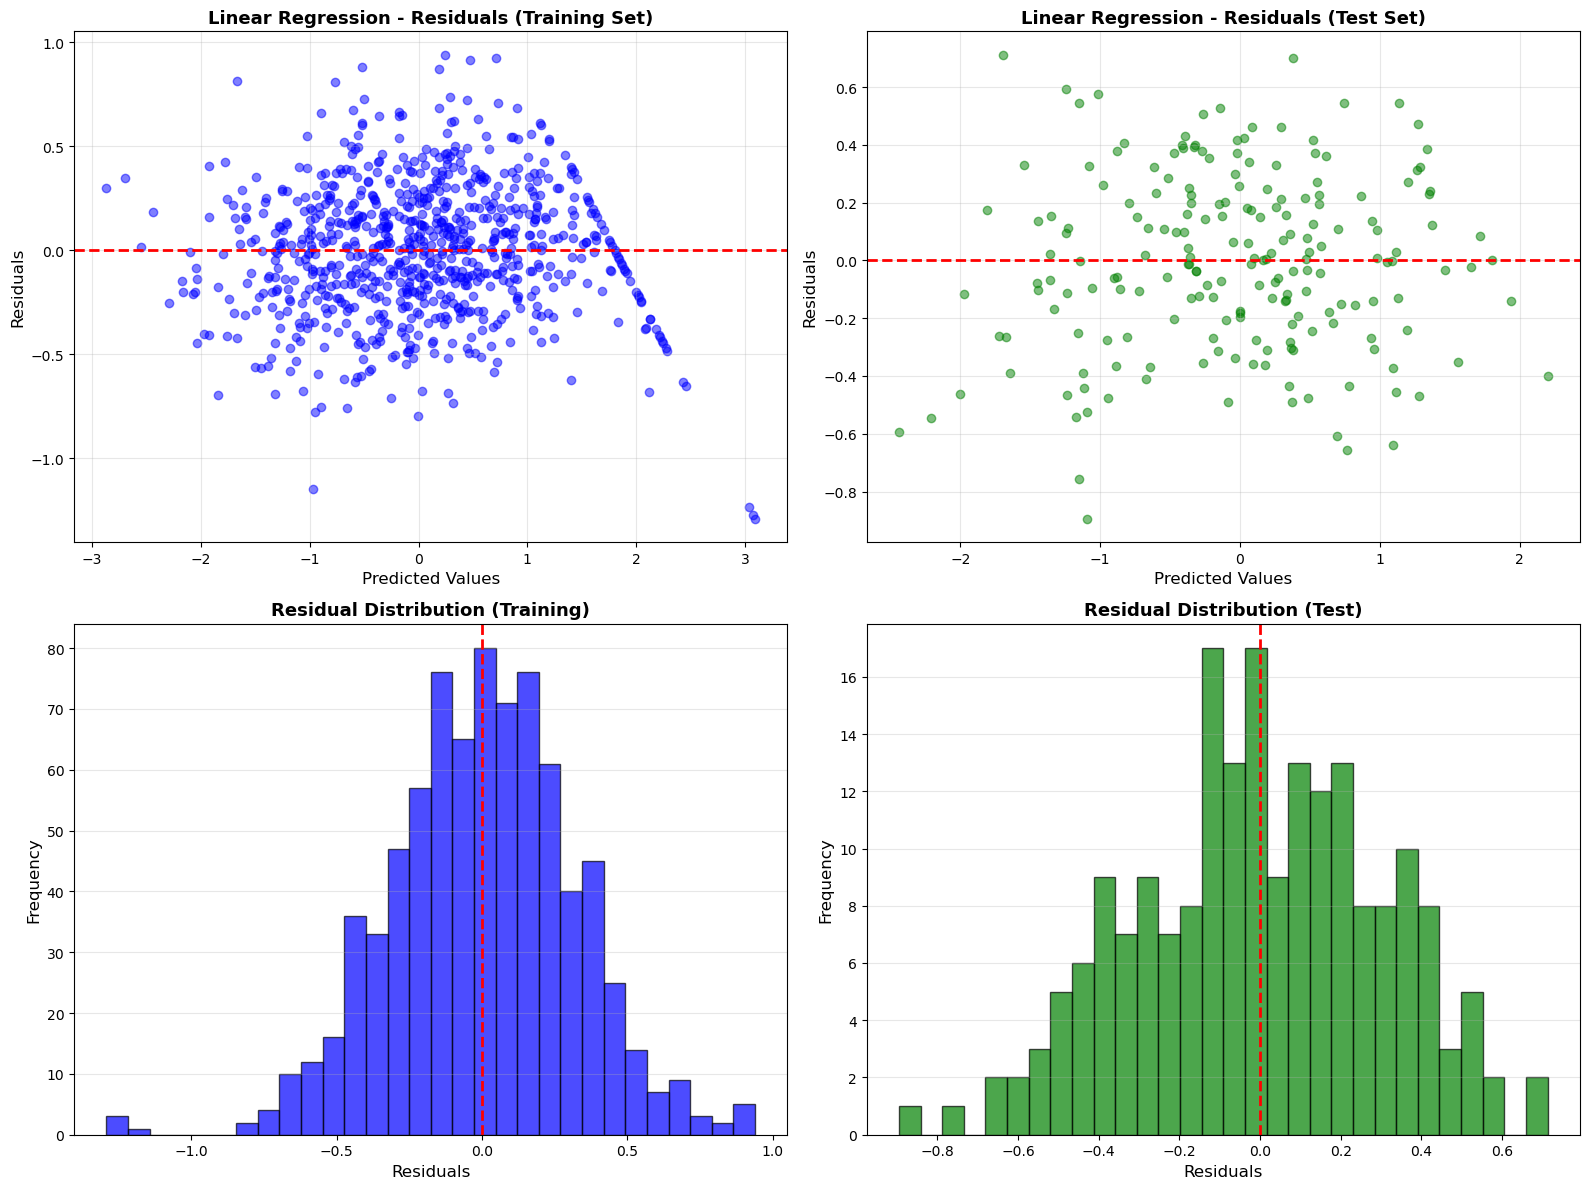


📊 Residual Statistics:
Training Set - Mean: 0.0000, Std: 0.3175
Test Set     - Mean: -0.0033, Std: 0.3057


In [60]:
# Residual analysis for best model
residuals_train = y_train - best_predictions['y_train_pred']
residuals_test = y_test - best_predictions['y_test_pred']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuals vs Predicted (Training)
axes[0, 0].scatter(best_predictions['y_train_pred'], residuals_train, alpha=0.5, color='blue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title(f'{best_model_name} - Residuals (Training Set)', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Residuals vs Predicted (Test)
axes[0, 1].scatter(best_predictions['y_test_pred'], residuals_test, alpha=0.5, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title(f'{best_model_name} - Residuals (Test Set)', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Residual Distribution (Training)
axes[1, 0].hist(residuals_train, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Residual Distribution (Training)', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Residual Distribution (Test)
axes[1, 1].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Residual Distribution (Test)', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Residual Statistics:")
print(f"Training Set - Mean: {residuals_train.mean():.4f}, Std: {residuals_train.std():.4f}")
print(f"Test Set     - Mean: {residuals_test.mean():.4f}, Std: {residuals_test.std():.4f}")

### 7. Residual Analysis (Best Model)

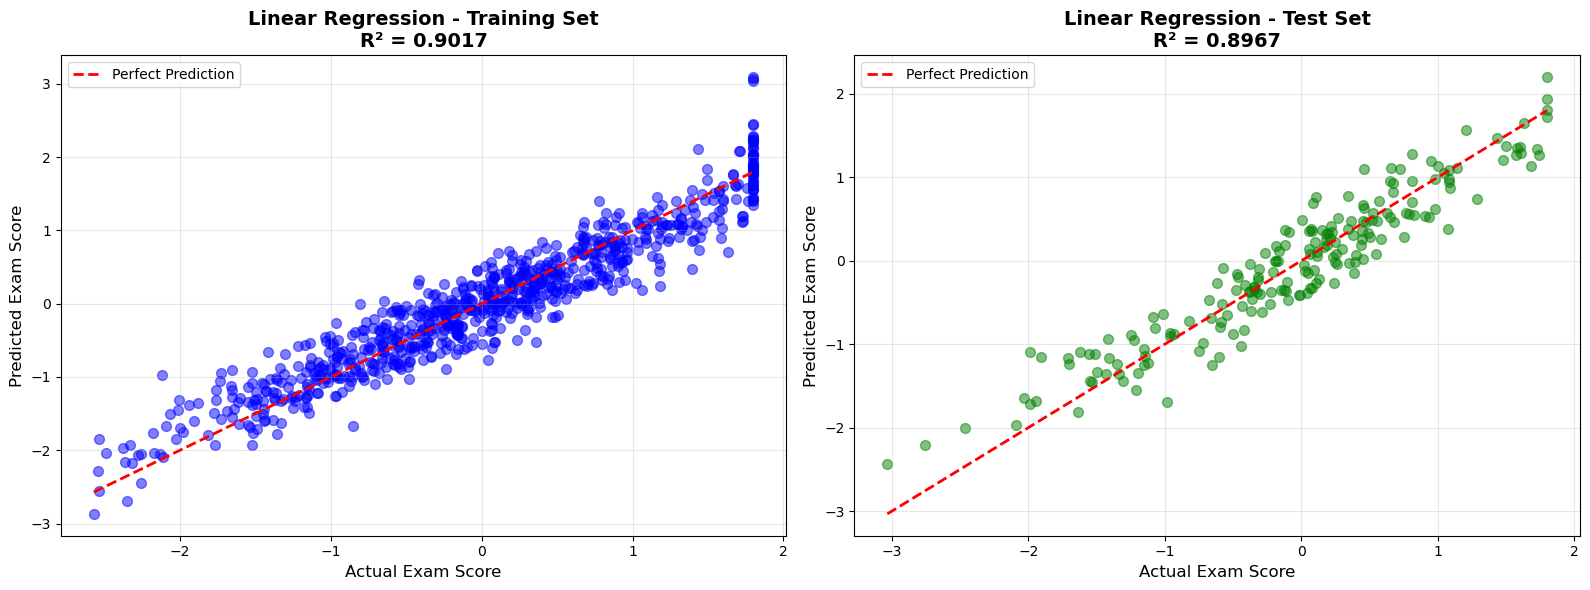

In [59]:
# Plot predicted vs actual for best model
best_predictions = predictions_dict[best_model_name]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
ax1 = axes[0]
ax1.scatter(y_train, best_predictions['y_train_pred'], alpha=0.5, s=50, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Exam Score', fontsize=12)
ax1.set_ylabel('Predicted Exam Score', fontsize=12)
ax1.set_title(f'{best_model_name} - Training Set\nR² = {results_df.iloc[0]["Train R²"]:.4f}', 
              fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Test set
ax2 = axes[1]
ax2.scatter(y_test, best_predictions['y_test_pred'], alpha=0.5, s=50, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Exam Score', fontsize=12)
ax2.set_ylabel('Predicted Exam Score', fontsize=12)
ax2.set_title(f'{best_model_name} - Test Set\nR² = {results_df.iloc[0]["Test R²"]:.4f}', 
              fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6. Predicted vs Actual (Best Model)

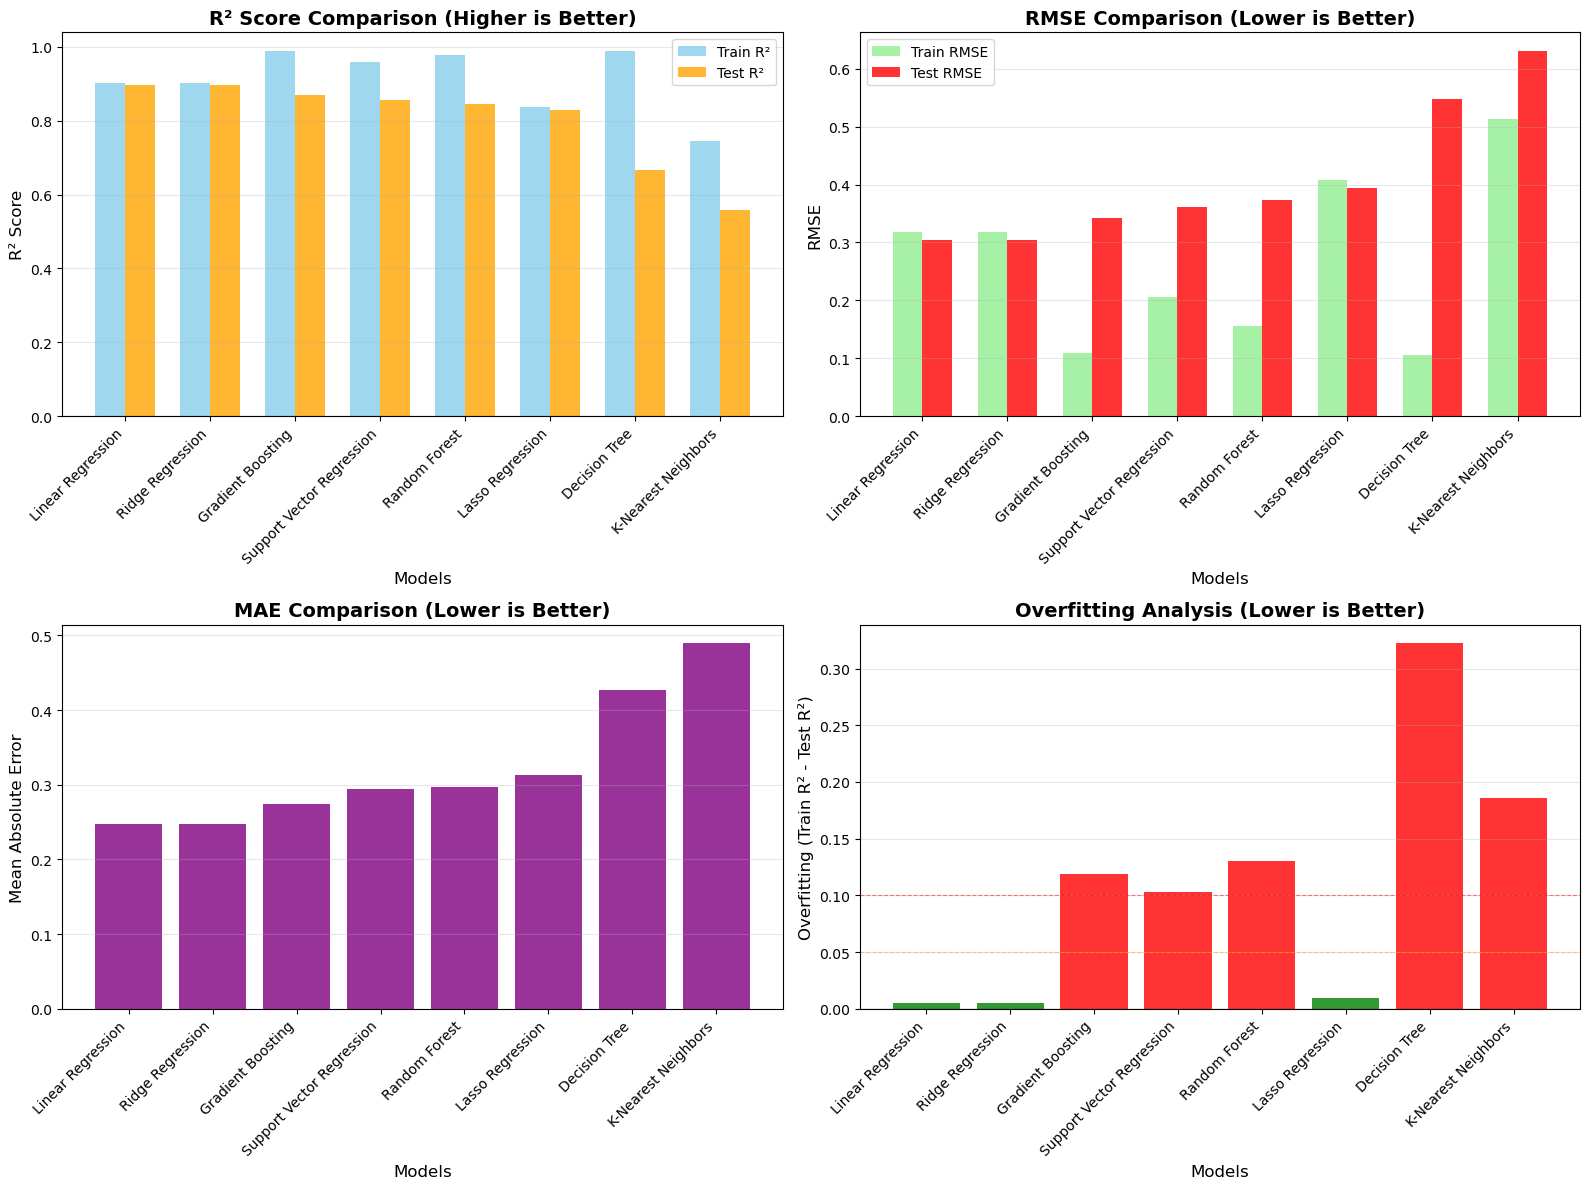

In [58]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R² Score Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
width = 0.35
ax1.bar(x_pos - width/2, results_df['Train R²'], width, label='Train R²', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, results_df['Test R²'], width, label='Test R²', alpha=0.8, color='orange')
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('R² Score Comparison (Higher is Better)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=0.8)

# 2. RMSE Comparison
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8, color='lightgreen')
ax2.bar(x_pos + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8, color='red')
ax2.set_xlabel('Models', fontsize=12)
ax2.set_ylabel('RMSE', fontsize=12)
ax2.set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. MAE Comparison
ax3 = axes[1, 0]
ax3.bar(results_df['Model'], results_df['Test MAE'], alpha=0.8, color='purple')
ax3.set_xlabel('Models', fontsize=12)
ax3.set_ylabel('Mean Absolute Error', fontsize=12)
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# 4. Overfitting Analysis
ax4 = axes[1, 1]
colors = ['red' if x > 0.1 else 'orange' if x > 0.05 else 'green' for x in results_df['Overfitting']]
ax4.bar(results_df['Model'], results_df['Overfitting'], alpha=0.8, color=colors)
ax4.set_xlabel('Models', fontsize=12)
ax4.set_ylabel('Overfitting (Train R² - Test R²)', fontsize=12)
ax4.set_title('Overfitting Analysis (Lower is Better)', fontsize=14, fontweight='bold')
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax4.axhline(y=0.05, color='orange', linestyle='--', linewidth=0.8, alpha=0.5)
ax4.axhline(y=0.1, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5. Visualization: Model Comparison

In [57]:
# Create results dataframe
results_df = pd.DataFrame(all_results)

# Sort by Test R² (descending)
results_df = results_df.sort_values('Test R²', ascending=False).reset_index(drop=True)

# Display full results
print("=" * 120)
print("📊 MODEL PERFORMANCE COMPARISON")
print("=" * 120)
print(results_df.to_string(index=False))
print("=" * 120)

# Display simplified comparison
print("\n" + "=" * 80)
print("📈 SIMPLIFIED COMPARISON (Test Set Performance)")
print("=" * 80)
simplified_df = results_df[['Model', 'Test R²', 'Test RMSE', 'Test MAE']].copy()
print(simplified_df.to_string(index=False))
print("=" * 80)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test R²']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"   Test RMSE: {results_df.iloc[0]['Test RMSE']:.4f}")
print(f"   Test MAE: {results_df.iloc[0]['Test MAE']:.4f}")

📊 MODEL PERFORMANCE COMPARISON
                    Model  Train R²  Test R²  Train MSE  Test MSE  Train RMSE  Test RMSE  Train MAE  Test MAE  Overfitting
        Linear Regression  0.901665 0.896666   0.100707  0.092995    0.317343   0.304950   0.249674  0.247183     0.004999
         Ridge Regression  0.901664 0.896609   0.100708  0.093046    0.317345   0.305035   0.249699  0.247263     0.005055
        Gradient Boosting  0.988430 0.869988   0.011850  0.117003    0.108855   0.342058   0.082762  0.274778     0.118441
Support Vector Regression  0.958289 0.854974   0.042717  0.130516    0.206680   0.361269   0.153702  0.293960     0.103315
            Random Forest  0.976257 0.845866   0.024316  0.138712    0.155935   0.372441   0.124804  0.296593     0.130391
         Lasso Regression  0.837609 0.827926   0.166308  0.154858    0.407809   0.393520   0.328733  0.312957     0.009683
            Decision Tree  0.989246 0.666848   0.011013  0.299819    0.104943   0.547557   0.057381  0.42634

### 4. Results Comparison Table

In [56]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

print(f"Training {len(models)} models...")
print("=" * 80)

# Store results
all_results = []
predictions_dict = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n🔄 Training {model_name}...")
    
    results, y_train_pred, y_test_pred = evaluate_model(
        model, X_train_std, X_test_std, y_train, y_test, model_name
    )
    
    all_results.append(results)
    predictions_dict[model_name] = {
        'model': model,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }
    
    print(f"   ✓ Test R²: {results['Test R²']:.4f} | Test RMSE: {results['Test RMSE']:.4f}")

print("\n" + "=" * 80)
print("✅ All models trained successfully!")

Training 8 models...

🔄 Training Linear Regression...
   ✓ Test R²: 0.8967 | Test RMSE: 0.3050

🔄 Training Ridge Regression...
   ✓ Test R²: 0.8966 | Test RMSE: 0.3050

🔄 Training Lasso Regression...
   ✓ Test R²: 0.8279 | Test RMSE: 0.3935

🔄 Training Decision Tree...
   ✓ Test R²: 0.6668 | Test RMSE: 0.5476

🔄 Training Random Forest...
   ✓ Test R²: 0.8459 | Test RMSE: 0.3724

🔄 Training Gradient Boosting...
   ✓ Test R²: 0.8700 | Test RMSE: 0.3421

🔄 Training Support Vector Regression...
   ✓ Test R²: 0.8550 | Test RMSE: 0.3613

🔄 Training K-Nearest Neighbors...
   ✓ Test R²: 0.5575 | Test RMSE: 0.6311

✅ All models trained successfully!
   ✓ Test R²: 0.8459 | Test RMSE: 0.3724

🔄 Training Gradient Boosting...
   ✓ Test R²: 0.8700 | Test RMSE: 0.3421

🔄 Training Support Vector Regression...
   ✓ Test R²: 0.8550 | Test RMSE: 0.3613

🔄 Training K-Nearest Neighbors...
   ✓ Test R²: 0.5575 | Test RMSE: 0.6311

✅ All models trained successfully!


### 3. Train Multiple Models

In [53]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a regression model
    Returns: dict with metrics
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Calculate metrics for test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': model_name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Overfitting': train_r2 - test_r2
    }
    
    return results, y_train_pred, y_test_pred

print("✓ Evaluation function defined")

✓ Evaluation function defined


In [54]:
# Complete Data Preprocessing and Model Training Pipeline
print("="*80)
print("🚀 STARTING COMPLETE ML PIPELINE")
print("="*80)

# Step 1: Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

print("\n✓ Step 1: Libraries imported")

# Step 2: Handle missing values
if df['parental_education_level'].isnull().sum() > 0:
    mode_value = df['parental_education_level'].mode()[0]
    df['parental_education_level'].fillna(mode_value, inplace=True)
    print(f"✓ Step 2: Filled missing values with mode: {mode_value}")
else:
    print("✓ Step 2: No missing values")

# Step 3: Label Encoding
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
if 'student_id' in categorical_cols:
    categorical_cols.remove('student_id')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print(f"✓ Step 3: Encoded {len(categorical_cols)} categorical variables")

# Step 4: Standardization
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'student_id' in numerical_features:
    numerical_features.remove('student_id')

df_standardized = df_encoded.copy()
scaler_standard = StandardScaler()
df_standardized[numerical_features] = scaler_standard.fit_transform(df_encoded[numerical_features])

print(f"✓ Step 4: Standardized {len(numerical_features)} numerical features")

# Step 5: Prepare data for ML
X_standardized = df_standardized.drop(['student_id', 'exam_score'], axis=1)
y = df_standardized['exam_score']

X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_standardized, y, test_size=0.2, random_state=42
)

print(f"✓ Step 5: Train-test split completed")
print(f"   Training set: {X_train_std.shape[0]} samples")
print(f"   Test set: {X_test_std.shape[0]} samples")
print(f"   Features: {X_train_std.shape[1]}")

print("\n" + "="*80)
print("✅ DATA PREPROCESSING COMPLETED - Ready for ML!")
print("="*80)

🚀 STARTING COMPLETE ML PIPELINE

✓ Step 1: Libraries imported
✓ Step 2: Filled missing values with mode: High School
✓ Step 3: Encoded 6 categorical variables
✓ Step 4: Standardized 15 numerical features
✓ Step 5: Train-test split completed
   Training set: 800 samples
   Test set: 200 samples
   Features: 14

✅ DATA PREPROCESSING COMPLETED - Ready for ML!


In [55]:
# Save the processed datasets for future use
import os

# Create output directory if it doesn't exist
output_dir = '/Users/mac/MAIPRJ/Team2_Project/data_processed'
os.makedirs(output_dir, exist_ok=True)

# Save encoded data
df_encoded.to_csv(f'{output_dir}/data_encoded.csv', index=False)
print(f"✓ Saved: {output_dir}/data_encoded.csv")

# Save standardized data
df_standardized.to_csv(f'{output_dir}/data_standardized.csv', index=False)
print(f"✓ Saved: {output_dir}/data_standardized.csv")

# Save train-test splits
X_train_std.to_csv(f'{output_dir}/X_train_standardized.csv', index=False)
X_test_std.to_csv(f'{output_dir}/X_test_standardized.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)
print(f"✓ Saved: Train-test splits")

print(f"\n📁 All processed files saved to: {output_dir}")


✓ Saved: /Users/mac/MAIPRJ/Team2_Project/data_processed/data_encoded.csv
✓ Saved: /Users/mac/MAIPRJ/Team2_Project/data_processed/data_standardized.csv
✓ Saved: Train-test splits

📁 All processed files saved to: /Users/mac/MAIPRJ/Team2_Project/data_processed


### 2. Define Evaluation Function

In [52]:
# Import ML libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("✓ Machine Learning libraries imported successfully")

✓ Machine Learning libraries imported successfully


### 1. Import Machine Learning Libraries

## 🤖 Machine Learning Models

Building and evaluating regression models to predict exam scores